This project is a fun use of data analysis techniques to compare the strengths and weaknesses of different creatures of the Pokemon franchise, pulling data from the "pokeapi" API.

# Pokemon API

In [17]:
import pandas as pd
import requests
import json
from IPython.display import Image

In [18]:
url = 'https://pokeapi.co/api/v2/pokemon/'

response = requests.request("GET", url)

In [19]:
data = json.loads(response.text)
data

{'count': 1302,
 'next': 'https://pokeapi.co/api/v2/pokemon/?offset=20&limit=20',
 'previous': None,
 'results': [{'name': 'bulbasaur',
   'url': 'https://pokeapi.co/api/v2/pokemon/1/'},
  {'name': 'ivysaur', 'url': 'https://pokeapi.co/api/v2/pokemon/2/'},
  {'name': 'venusaur', 'url': 'https://pokeapi.co/api/v2/pokemon/3/'},
  {'name': 'charmander', 'url': 'https://pokeapi.co/api/v2/pokemon/4/'},
  {'name': 'charmeleon', 'url': 'https://pokeapi.co/api/v2/pokemon/5/'},
  {'name': 'charizard', 'url': 'https://pokeapi.co/api/v2/pokemon/6/'},
  {'name': 'squirtle', 'url': 'https://pokeapi.co/api/v2/pokemon/7/'},
  {'name': 'wartortle', 'url': 'https://pokeapi.co/api/v2/pokemon/8/'},
  {'name': 'blastoise', 'url': 'https://pokeapi.co/api/v2/pokemon/9/'},
  {'name': 'caterpie', 'url': 'https://pokeapi.co/api/v2/pokemon/10/'},
  {'name': 'metapod', 'url': 'https://pokeapi.co/api/v2/pokemon/11/'},
  {'name': 'butterfree', 'url': 'https://pokeapi.co/api/v2/pokemon/12/'},
  {'name': 'weedle', '

## A Single Pokemon's Stats

In [20]:
name = 'bulbasaur'
url = 'https://pokeapi.co/api/v2/pokemon/1/'
response = requests.request("GET", url)
data = json.loads(response.text)
stats = data['stats']

In [21]:
stats[0]

{'base_stat': 45,
 'effort': 0,
 'stat': {'name': 'hp', 'url': 'https://pokeapi.co/api/v2/stat/1/'}}

In [22]:
n=0

stat = stats[n]['stat']['name']
value = stats[n]['base_stat']
print(stat)
print(value)

hp
45


In [23]:
df_temp = pd.DataFrame(index=[name])
df_temp

""
bulbasaur


In [24]:
i = 0

moreStats = True

while moreStats:
  try:
    stat = stats[i]['stat']['name']
    value = stats[i]['base_stat']
    df_temp[stat] = [value]
    print(stat)
    print(value)
  except:
    moreStats = False
  i = i+1

hp
45
attack
49
defense
49
special-attack
65
special-defense
65
speed
45


In [25]:
df_temp

,hp,attack,defense,special-attack,special-defense,speed
bulbasaur,45,49,49,65,65,45


In [26]:
def get_data(name,url):
  response = requests.request("GET", url)
  data = json.loads(response.text)
  stats = data['stats']

  df_temp = pd.DataFrame(index=[name])

  i = 0

  moreStats = True

  while moreStats:
    try:
      stat = stats[i]['stat']['name']
      value = stats[i]['base_stat']
      df_temp[stat] = [value]
    except:
      moreStats = False
    i = i+1
  return df_temp

In [27]:
name = 'bulbasaur'
url = 'https://pokeapi.co/api/v2/pokemon/1/'

get_data(name,url)

,hp,attack,defense,special-attack,special-defense,speed
bulbasaur,45,49,49,65,65,45


## A Batch of Pokemon Stats

In [28]:
url = 'https://pokeapi.co/api/v2/pokemon/'

response = requests.request("GET", url)
data = json.loads(response.text)
data

{'count': 1302,
 'next': 'https://pokeapi.co/api/v2/pokemon/?offset=20&limit=20',
 'previous': None,
 'results': [{'name': 'bulbasaur',
   'url': 'https://pokeapi.co/api/v2/pokemon/1/'},
  {'name': 'ivysaur', 'url': 'https://pokeapi.co/api/v2/pokemon/2/'},
  {'name': 'venusaur', 'url': 'https://pokeapi.co/api/v2/pokemon/3/'},
  {'name': 'charmander', 'url': 'https://pokeapi.co/api/v2/pokemon/4/'},
  {'name': 'charmeleon', 'url': 'https://pokeapi.co/api/v2/pokemon/5/'},
  {'name': 'charizard', 'url': 'https://pokeapi.co/api/v2/pokemon/6/'},
  {'name': 'squirtle', 'url': 'https://pokeapi.co/api/v2/pokemon/7/'},
  {'name': 'wartortle', 'url': 'https://pokeapi.co/api/v2/pokemon/8/'},
  {'name': 'blastoise', 'url': 'https://pokeapi.co/api/v2/pokemon/9/'},
  {'name': 'caterpie', 'url': 'https://pokeapi.co/api/v2/pokemon/10/'},
  {'name': 'metapod', 'url': 'https://pokeapi.co/api/v2/pokemon/11/'},
  {'name': 'butterfree', 'url': 'https://pokeapi.co/api/v2/pokemon/12/'},
  {'name': 'weedle', '

In [29]:
data['results']

[{'name': 'bulbasaur', 'url': 'https://pokeapi.co/api/v2/pokemon/1/'},
 {'name': 'ivysaur', 'url': 'https://pokeapi.co/api/v2/pokemon/2/'},
 {'name': 'venusaur', 'url': 'https://pokeapi.co/api/v2/pokemon/3/'},
 {'name': 'charmander', 'url': 'https://pokeapi.co/api/v2/pokemon/4/'},
 {'name': 'charmeleon', 'url': 'https://pokeapi.co/api/v2/pokemon/5/'},
 {'name': 'charizard', 'url': 'https://pokeapi.co/api/v2/pokemon/6/'},
 {'name': 'squirtle', 'url': 'https://pokeapi.co/api/v2/pokemon/7/'},
 {'name': 'wartortle', 'url': 'https://pokeapi.co/api/v2/pokemon/8/'},
 {'name': 'blastoise', 'url': 'https://pokeapi.co/api/v2/pokemon/9/'},
 {'name': 'caterpie', 'url': 'https://pokeapi.co/api/v2/pokemon/10/'},
 {'name': 'metapod', 'url': 'https://pokeapi.co/api/v2/pokemon/11/'},
 {'name': 'butterfree', 'url': 'https://pokeapi.co/api/v2/pokemon/12/'},
 {'name': 'weedle', 'url': 'https://pokeapi.co/api/v2/pokemon/13/'},
 {'name': 'kakuna', 'url': 'https://pokeapi.co/api/v2/pokemon/14/'},
 {'name': '

In [30]:
results = data['results']

In [31]:
results[0]['url']

'https://pokeapi.co/api/v2/pokemon/1/'

In [32]:
batch_df = pd.DataFrame()

for result in results:
  name = result['name']
  url = result['url']
  print(get_data(name,url))
  batch_df = pd.concat([batch_df,get_data(name,url)])

batch_df

           hp  attack  defense  special-attack  special-defense  speed
bulbasaur  45      49       49              65               65     45
         hp  attack  defense  special-attack  special-defense  speed
ivysaur  60      62       63              80               80     60
          hp  attack  defense  special-attack  special-defense  speed
venusaur  80      82       83             100              100     80
            hp  attack  defense  special-attack  special-defense  speed
charmander  39      52       43              60               50     65
            hp  attack  defense  special-attack  special-defense  speed
charmeleon  58      64       58              80               65     80
           hp  attack  defense  special-attack  special-defense  speed
charizard  78      84       78             109               85    100
          hp  attack  defense  special-attack  special-defense  speed
squirtle  44      48       65              50               64     43
          

,hp,attack,defense,special-attack,special-defense,speed
bulbasaur,45,49,49,65,65,45
ivysaur,60,62,63,80,80,60
venusaur,80,82,83,100,100,80
charmander,39,52,43,60,50,65
charmeleon,58,64,58,80,65,80
charizard,78,84,78,109,85,100
squirtle,44,48,65,50,64,43
wartortle,59,63,80,65,80,58
blastoise,79,83,100,85,105,78
caterpie,45,30,35,20,20,45


In [33]:
def get_batch(results):
  batch_df = pd.DataFrame()

  for result in results:
    name = result['name']
    url = result['url']
    batch_df = pd.concat([batch_df,get_data(name,url)])

  return batch_df


In [34]:
url = 'https://pokeapi.co/api/v2/pokemon/'

reponse = requests.request("GET", url)
data = json.loads(response.text)

get_batch(data['results'])


,hp,attack,defense,special-attack,special-defense,speed
bulbasaur,45,49,49,65,65,45
ivysaur,60,62,63,80,80,60
venusaur,80,82,83,100,100,80
charmander,39,52,43,60,50,65
charmeleon,58,64,58,80,65,80
charizard,78,84,78,109,85,100
squirtle,44,48,65,50,64,43
wartortle,59,63,80,65,80,58
blastoise,79,83,100,85,105,78
caterpie,45,30,35,20,20,45


## All Pokemon Stats

In [35]:
url = 'https://pokeapi.co/api/v2/pokemon/'
next_url = url

pokemon_df = pd.DataFrame()

stop = False

while not stop:

  try:
    response = requests.request("GET", next_url)
    data = json.loads(response.text)
  except:
    stop = True
    break

  pokemon_df = pd.concat([pokemon_df,get_batch(data['results'])])

  next_url = data['next']
  print(next_url)


https://pokeapi.co/api/v2/pokemon/?offset=20&limit=20
https://pokeapi.co/api/v2/pokemon/?offset=40&limit=20
https://pokeapi.co/api/v2/pokemon/?offset=60&limit=20
https://pokeapi.co/api/v2/pokemon/?offset=80&limit=20
https://pokeapi.co/api/v2/pokemon/?offset=100&limit=20
https://pokeapi.co/api/v2/pokemon/?offset=120&limit=20
https://pokeapi.co/api/v2/pokemon/?offset=140&limit=20
https://pokeapi.co/api/v2/pokemon/?offset=160&limit=20
https://pokeapi.co/api/v2/pokemon/?offset=180&limit=20
https://pokeapi.co/api/v2/pokemon/?offset=200&limit=20
https://pokeapi.co/api/v2/pokemon/?offset=220&limit=20
https://pokeapi.co/api/v2/pokemon/?offset=240&limit=20
https://pokeapi.co/api/v2/pokemon/?offset=260&limit=20
https://pokeapi.co/api/v2/pokemon/?offset=280&limit=20
https://pokeapi.co/api/v2/pokemon/?offset=300&limit=20
https://pokeapi.co/api/v2/pokemon/?offset=320&limit=20
https://pokeapi.co/api/v2/pokemon/?offset=340&limit=20
https://pokeapi.co/api/v2/pokemon/?offset=360&limit=20
https://pokeap

# Pokemon EDA

In [36]:
pokemon_df

,hp,attack,defense,special-attack,special-defense,speed
bulbasaur,45,49,49,65,65,45
ivysaur,60,62,63,80,80,60
venusaur,80,82,83,100,100,80
charmander,39,52,43,60,50,65
charmeleon,58,64,58,80,65,80
...,...,...,...,...,...,...
ogerpon-wellspring-mask,80,120,84,60,96,110
ogerpon-hearthflame-mask,80,120,84,60,96,110
ogerpon-cornerstone-mask,80,120,84,60,96,110
terapagos-terastal,95,95,110,105,110,85


In [ ]:
pokemon_df.describe()

,hp,attack,defense,special-attack,special-defense,speed
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,71.264977,81.580645,75.241935,73.649002,72.966974,71.156682
std,26.764202,31.673015,30.492559,32.469611,27.358069,30.310259
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,54.000000,58.000000,53.000000,50.000000,52.000000,48.000000
50%,70.000000,80.000000,70.000000,65.000000,70.000000,70.000000
75%,85.000000,100.000000,95.000000,95.000000,90.000000,92.000000
max,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


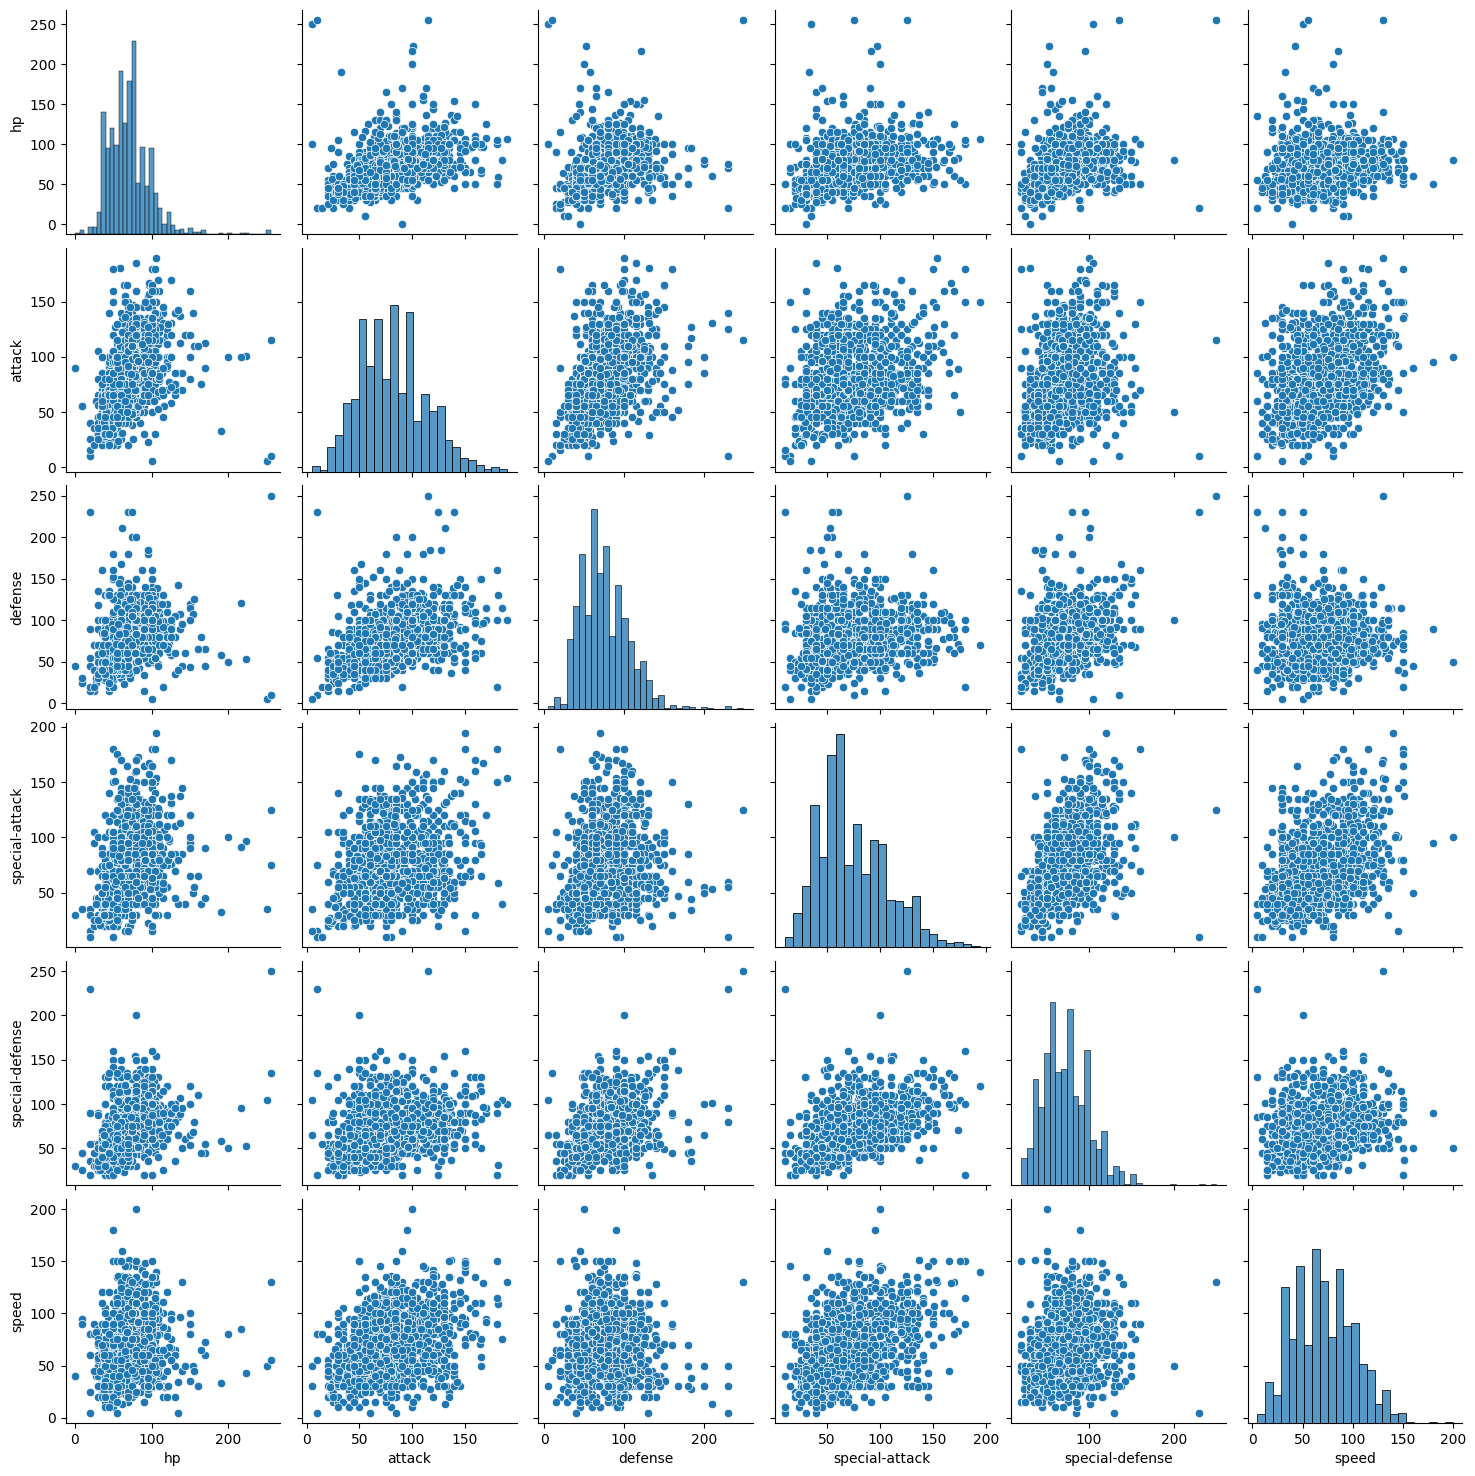

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(pokemon_df)
plt.show()

In [ ]:
normalize = lambda x: x/x.sum()

In [ ]:
pokemon_norm = pokemon_df.apply(normalize, axis=1)
pokemon_norm

,hp,attack,defense,special-attack,special-defense,speed
bulbasaur,0.141509,0.154088,0.154088,0.204403,0.204403,0.141509
ivysaur,0.148148,0.153086,0.155556,0.197531,0.197531,0.148148
venusaur,0.152381,0.156190,0.158095,0.190476,0.190476,0.152381
charmander,0.126214,0.168285,0.139159,0.194175,0.161812,0.210356
charmeleon,0.143210,0.158025,0.143210,0.197531,0.160494,0.197531
...,...,...,...,...,...,...
ogerpon-wellspring-mask,0.145455,0.218182,0.152727,0.109091,0.174545,0.200000
ogerpon-hearthflame-mask,0.145455,0.218182,0.152727,0.109091,0.174545,0.200000
ogerpon-cornerstone-mask,0.145455,0.218182,0.152727,0.109091,0.174545,0.200000
terapagos-terastal,0.158333,0.158333,0.183333,0.175000,0.183333,0.141667


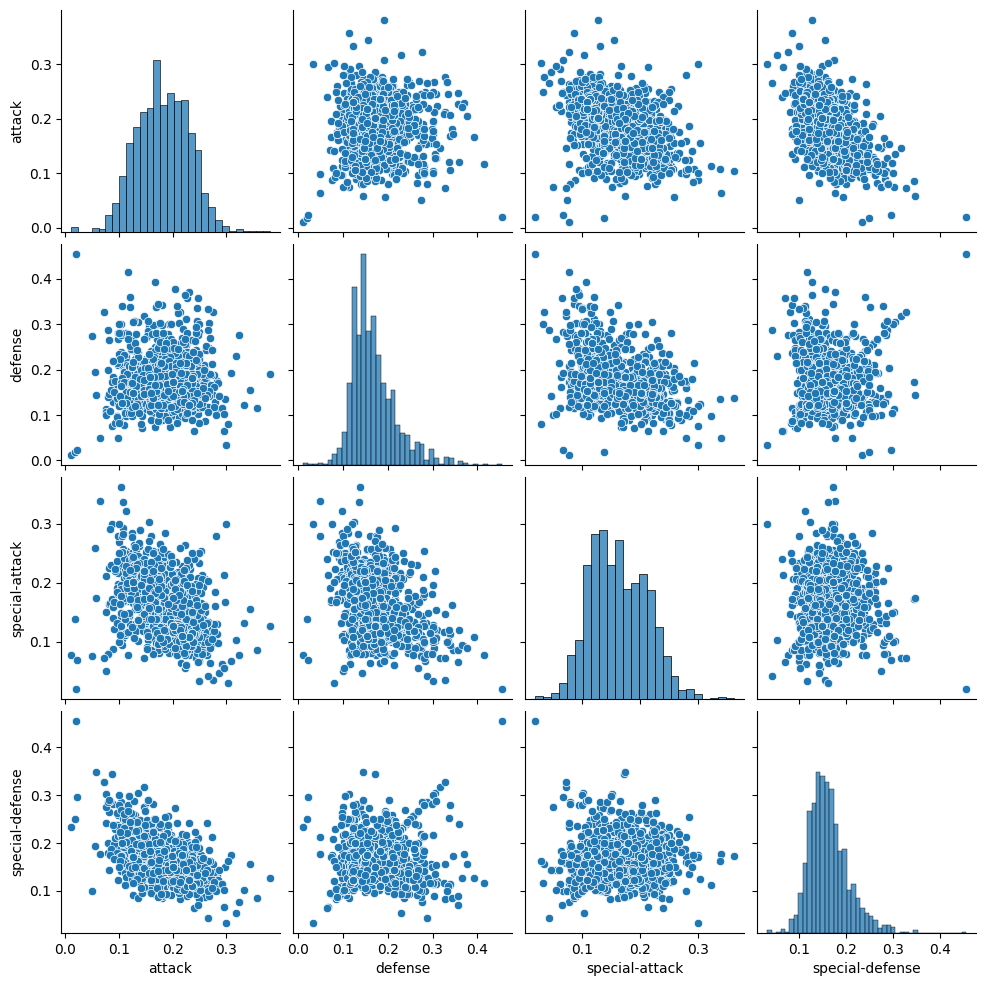

In [ ]:
pokemon_simp = pokemon_norm.drop(columns=['hp','speed'])
sns.pairplot(pokemon_simp)
plt.show()

In [ ]:
# Reset the index
pokemon_df = pokemon_df.reset_index()

# Now the index is converted to a column named 'index'.
# If you want to rename it to 'pokemon_name', you can do so
pokemon_df = pokemon_df.rename(columns={'index': 'pokemon_name'})

In [ ]:
pokemon_df

,pokemon_name,hp,attack,defense,special-attack,special-defense,speed
0,bulbasaur,45,49,49,65,65,45
1,ivysaur,60,62,63,80,80,60
2,venusaur,80,82,83,100,100,80
3,charmander,39,52,43,60,50,65
4,charmeleon,58,64,58,80,65,80
...,...,...,...,...,...,...,...
1297,ogerpon-wellspring-mask,80,120,84,60,96,110
1298,ogerpon-hearthflame-mask,80,120,84,60,96,110
1299,ogerpon-cornerstone-mask,80,120,84,60,96,110
1300,terapagos-terastal,95,95,110,105,110,85


In [ ]:
import requests
import pandas as pd

# Assuming pokemon_df is your DataFrame and it has a column 'pokemon' with the names of the pokemons
def get_pokemon_type(name):
    response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{name}')
    data = response.json()
    types = [t['type']['name'] for t in data['types']]
    return types

# Apply the function to the 'pokemon' column
pokemon_df['type'] = pokemon_df['pokemon_name'].apply(get_pokemon_type)

In [ ]:
pokemon_df

,pokemon_name,hp,attack,defense,special-attack,special-defense,speed,type
0,bulbasaur,45,49,49,65,65,45,"[grass, poison]"
1,ivysaur,60,62,63,80,80,60,"[grass, poison]"
2,venusaur,80,82,83,100,100,80,"[grass, poison]"
3,charmander,39,52,43,60,50,65,[fire]
4,charmeleon,58,64,58,80,65,80,[fire]
...,...,...,...,...,...,...,...,...
1297,ogerpon-wellspring-mask,80,120,84,60,96,110,"[grass, water]"
1298,ogerpon-hearthflame-mask,80,120,84,60,96,110,"[grass, fire]"
1299,ogerpon-cornerstone-mask,80,120,84,60,96,110,"[grass, rock]"
1300,terapagos-terastal,95,95,110,105,110,85,[normal]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# Assuming pokemon_df is your DataFrame

# Create dummy variables for the 'type' column
type_dummies = pd.get_dummies(pokemon_df['type'].apply(pd.Series).stack()).sum(level=0)

# Join the dummy variables to the original DataFrame
pokemon_df = pd.concat([pokemon_df, type_dummies], axis=1)

# Drop the original 'type' column (now redundant)
pokemon_df = pokemon_df.drop('type', axis=1)

# Define the feature columns (all columns except 'hp')
feature_cols = [col for col in pokemon_df.columns if col != 'hp']

# Define the target column ('hp')
target_col = 'hp'

# Split the data into features (X) and target (y)
X = pokemon_df[feature_cols]
y = pokemon_df[target_col]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the root mean squared error of the predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Root Mean Squared Error: {rmse}')

<ipython-input-34-4e2309b687ac>:11: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  type_dummies = pd.get_dummies(pokemon_df['type'].apply(pd.Series).stack()).sum(level=0)


ValueError: could not convert string to float: 'dragonair'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming pokemon_df is your DataFrame

# Define the feature columns (all columns except 'hp')
feature_cols = [col for col in pokemon_df.columns if col != 'hp']

# Define the target column ('hp')
target_col = 'hp'

# Split the data into features (X) and target (y)
X = pokemon_df[feature_cols]
y = pokemon_df[target_col]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the root mean squared error of the predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Root Mean Squared Error: {rmse}')


ValueError: could not convert string to float: 'dragonair'

In [ ]:
# Drop the 'pokemon_name' column
pokemon_df = pokemon_df.drop('pokemon_name', axis=1)

# Define the feature columns (all columns except 'hp')
feature_cols = [col for col in pokemon_df.columns if col != 'hp']

# Define the target column ('hp')
target_col = 'hp'

# Split the data into features (X) and target (y)
X = pokemon_df[feature_cols]
y = pokemon_df[target_col]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the root mean squared error of the predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 18.890427928432413


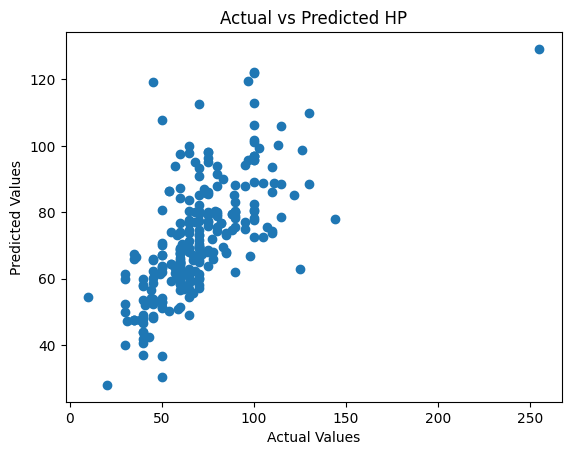

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted HP')
plt.show()

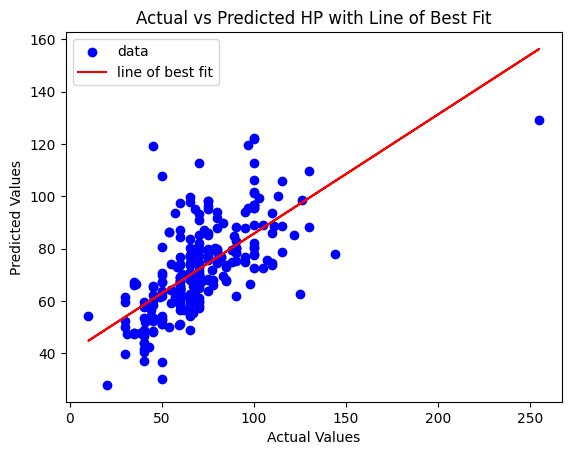

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='data')

# Calculate the line of best fit
m, b = np.polyfit(y_test, y_pred, 1)

# Add the line of best fit to the plot
plt.plot(y_test, m*y_test + b, color='red', label='line of best fit')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted HP with Line of Best Fit')
plt.legend()
plt.show()


In [ ]:
!pip install openpyxl

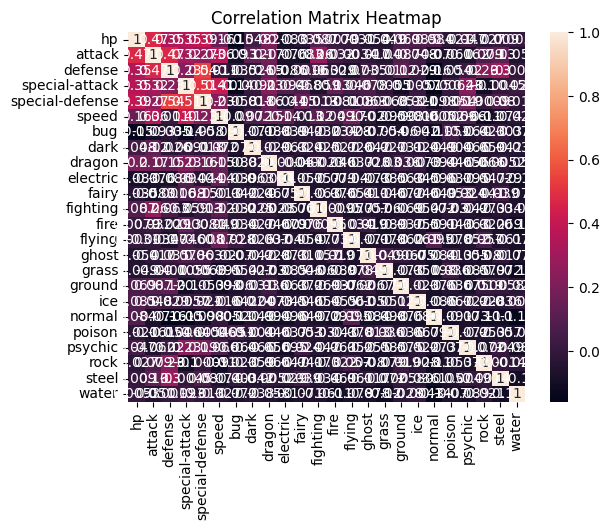

In [ ]:
import seaborn as sns

corr_matrix = pokemon_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

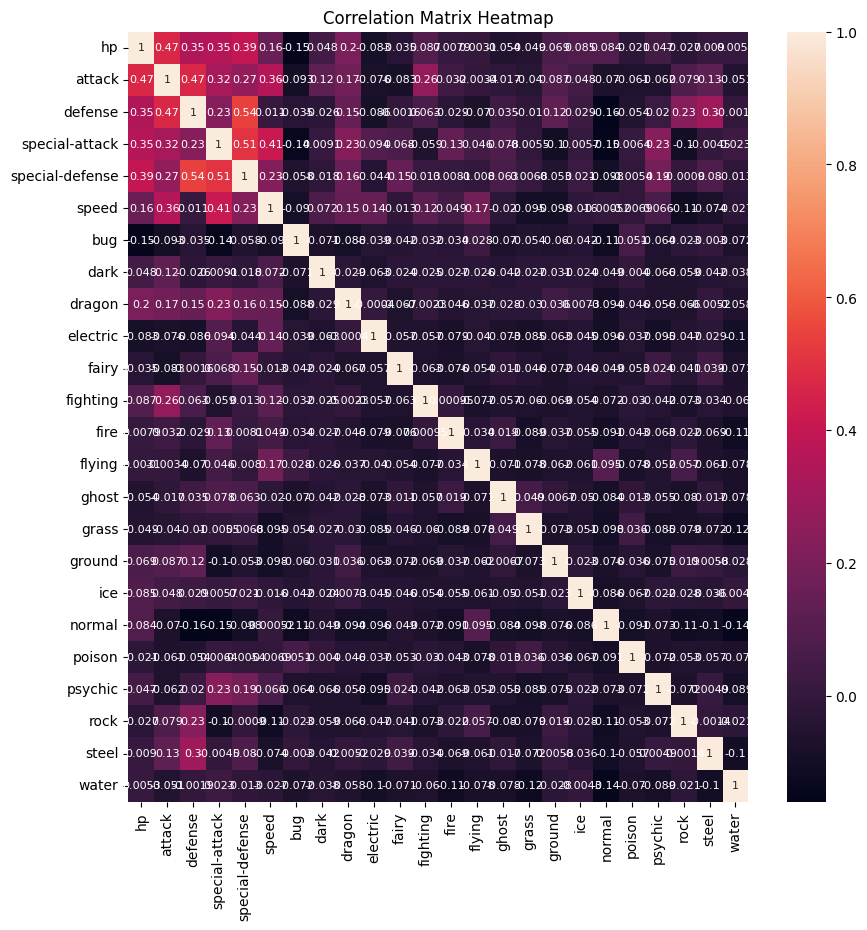

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(10, 10))

# Calculate the correlation matrix
corr_matrix = pokemon_df.corr()

# Create the heatmap with decreased font size and rotated x-axis labels
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 8})

# Rotate the x-axis labels
plt.xticks(rotation=90)

plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

NameError: name 'residuals' is not defined

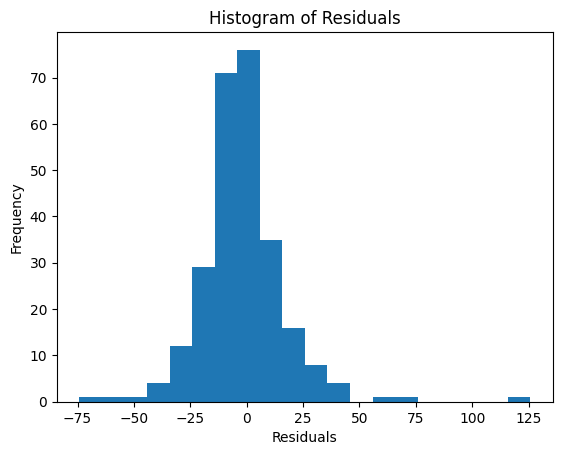

In [ ]:
# Calculate the residuals
residuals = y_test - y_pred

# Plot the histogram of residuals
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()
